# Mobile Strategy Games

## Background

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as Clash of Clans, Plants vs Zombies and Pokemon GO.

## Prepare Default Packages

In [133]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import requests
from PIL import Image
from io import BytesIO
import urllib.request

from wordcloud import WordCloud

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

In [2]:
df = pd.read_csv('appstore_games.csv')
print(df.columns)
df.head()

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## Explore the Data

In [6]:
df.describe()   # Only for numeric column

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [7]:
df.describe(include='O')  # include categorical values

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/lotus-digital/id...,Stick War: Legacy,Emoji Stickers,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


In [8]:
df.count()

URL                             17007
ID                              17007
Name                            17007
Subtitle                         5261
Icon URL                        17007
Average User Rating              7561
User Rating Count                7561
Price                           16983
In-app Purchases                 7683
Description                     17007
Developer                       17007
Age Rating                      17007
Languages                       16947
Size                            17006
Primary Genre                   17007
Genres                          17007
Original Release Date           17007
Current Version Release Date    17007
dtype: int64

## Analysis

### High Level

#### Most popular Games (Top 5)

In [99]:
df_top_pop = df.copy()
df_top_pop['Popularity Index'] = df_top_pop['Average User Rating'] * df_top_pop['User Rating Count']
df_top_5 = df_top_pop.sort_values(by='Popularity Index', ascending=False)[['Name', 'Subtitle', 'Icon URL', 'Average User Rating', 'User Rating Count', 'Popularity Index']].head()
df_top_5

,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Popularity Index
1378,Clash of Clans,Build your empire,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,3032734.0,13647303.0
7187,Clash Royale,Epic Real-Time Card Battles!,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,1277095.0,5746927.5
13414,PUBG MOBILE,Team up! New 4v4 Mode is here,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,711409.0,3201340.5
1921,Plants vs. Zombies\u2122 2,Save your brains!,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,469562.0,2113029.0
12473,"Cash, Inc. Fame & Fortune Game",Fun Strategy Business Clicker!,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,374772.0,1873860.0


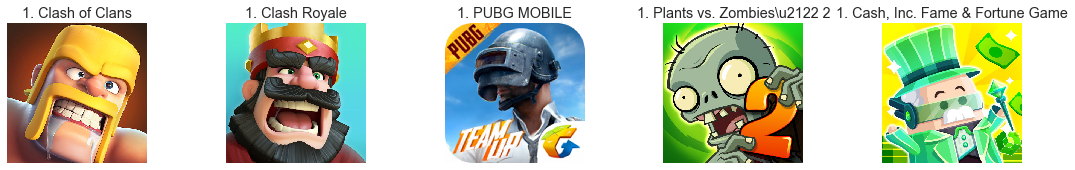

In [116]:
plt.figure(figsize=(15,3))

for i in range(5):
    loc = int('15' + str(i+1))
    plt.subplot(loc)
    image = Image.open(urllib.request.urlopen(df_top_5['Icon URL'].iloc[i]))
    plt.title('1. %s'%(df_top_5['Name'].iloc[i]))
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()

#### Name and subtitles

Detect the most distinctive features among these strategy games

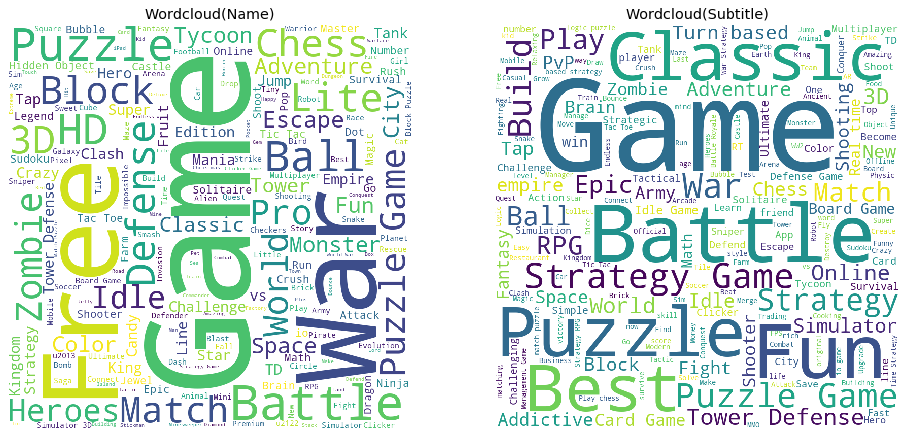

CPU times: user 2.73 s, sys: 279 ms, total: 3.01 s
Wall time: 3.01 s


In [15]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)))
#wordcloud_des = WordCloud(background_color='white', width=800, height=800).generate(' '.join(df['Description']))
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

* Name
 * Game, Free, War, Battle, Puzzle;
* Subtitile
 * Game, Classic, Battle, Puzzle

#### Keywords for Popular Games

In [50]:
df_pop = df[['Name', 'Subtitle', 'User Rating Count']].sort_values(by=['User Rating Count'], ascending=False)
df_pop.head()

,Name,Subtitle,User Rating Count
1378,Clash of Clans,Build your empire,3032734.0
7187,Clash Royale,Epic Real-Time Card Battles!,1277095.0
13414,PUBG MOBILE,Team up! New 4v4 Mode is here,711409.0
1921,Plants vs. Zombies\u2122 2,Save your brains!,469562.0
8139,Pok\xe9mon GO,Discover Pok\xe9mon worldwide,439776.0


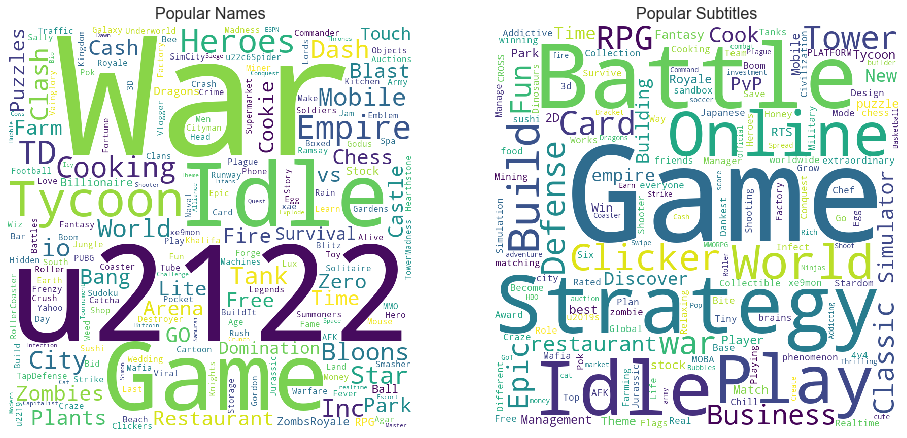

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
wordcloud1 = WordCloud(background_color='white', width=800, height=800).generate(' '.join(df_pop['Name'].iloc[:100]))
wordcloud2 = WordCloud(background_color='white', width=800, height=800).generate(' '.join(df_pop['Subtitle'].iloc[:100].dropna().astype(str)))
ax[0].set_title('Popular Names', fontsize=16)
ax[0].axis('off')
ax[0].imshow(wordcloud1)
ax[1].set_title('Popular Subtitles', fontsize=16)
ax[1].axis('off')
ax[1].imshow(wordcloud2)

* War/Battle is preferred by users

#### Primary Genres and Genres

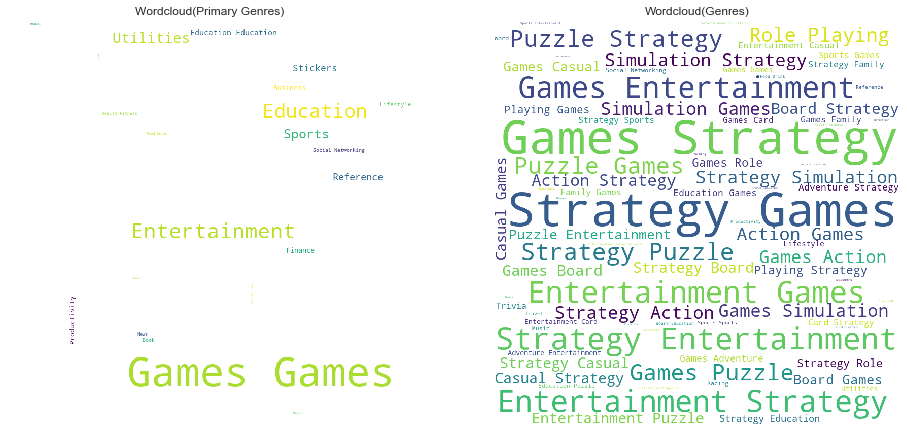

CPU times: user 2.15 s, sys: 162 ms, total: 2.32 s
Wall time: 2.33 s


In [42]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(16, 32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Primary Genre']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Genres'].dropna().astype(str)))
#wordcloud_des = WordCloud(background_color='white', width=800, height=800).generate(' '.join(df['Description']))
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Primary Genres)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Genres)')
plt.show()

#### Icon URL

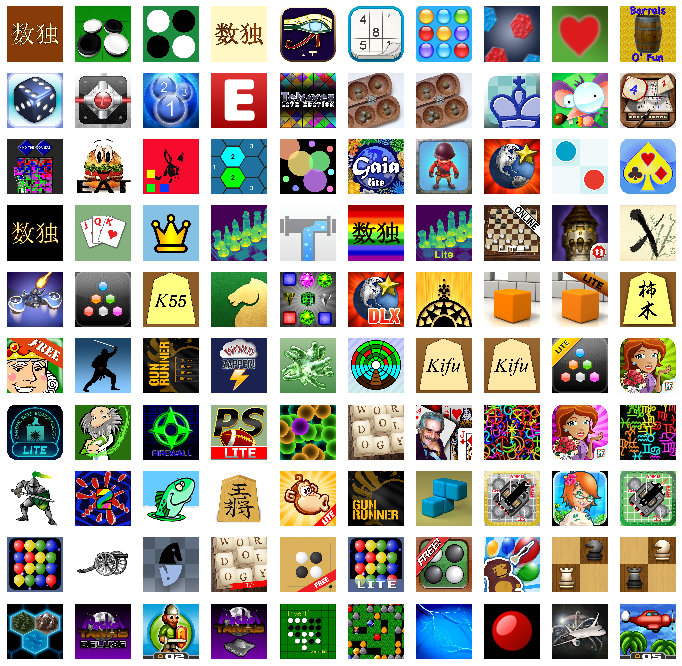

CPU times: user 7.85 s, sys: 215 ms, total: 8.06 s
Wall time: 21.8 s


In [18]:
%%time
fig, ax = plt.subplots(10, 10, figsize=(12, 12))
for i in range(100):
    r = requests.get(df['Icon URL'][i])
    im = Image.open(BytesIO(r.content))
    ax[i//10][i%10].imshow(im)
    ax[i//10][i%10].axis('off')
plt.show()

### Detailed Level

The relationship among factors

#### User Rating

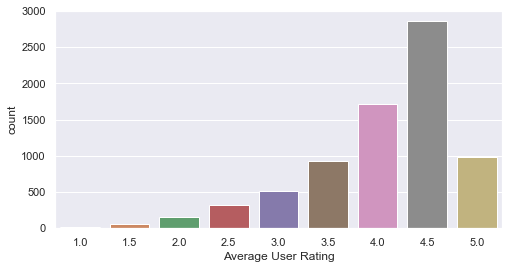

In [37]:
fig = plt.figure(figsize=(8, 4))
sns.countplot(df['Average User Rating'])

In [38]:
df['Average User Rating'].count()

7561

In [40]:
percent_larger_4 = df[df['Average User Rating'] >= 4]['Average User Rating'].count()/df['Average User Rating'].count()
percent_larger_4

0.737071815897368

#### User ratings for paid games vs free games

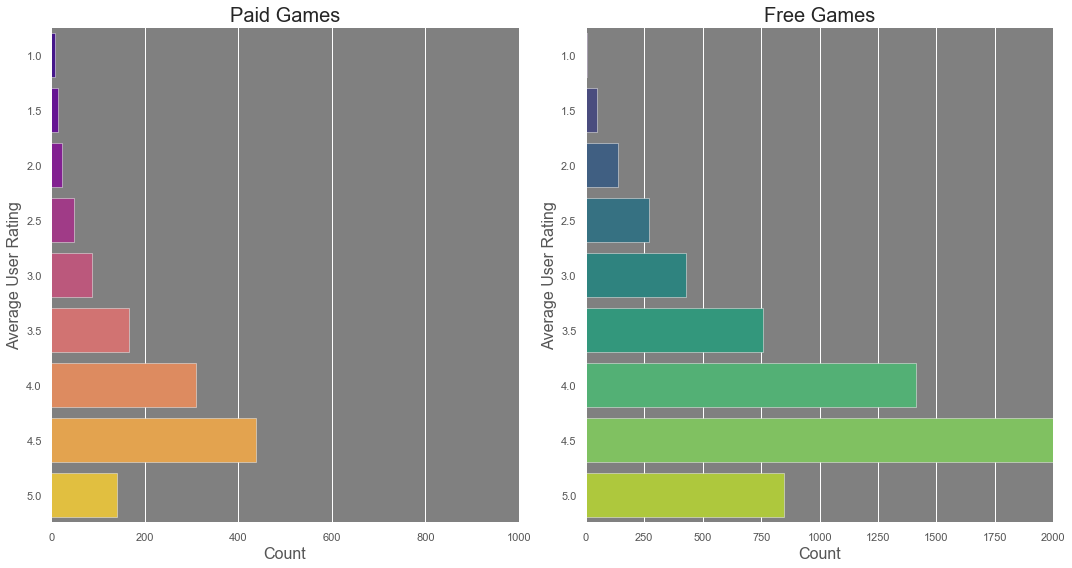

In [152]:
paid = df[df['Price']>0]
free = df[(df['Price']==0) | (df['Price'].isnull()==True )]

fig, ax = plt.subplots(1, 2, figsize=(15,8))

sns.countplot(data=paid, y='Average User Rating', ax=ax[0], palette='plasma')
ax[0].set_title('Paid Games', fontsize=20)
ax[0].set_xlim([0, 1000])
ax[0].set_xlabel('Count', fontsize=16)
ax[0].set_ylabel('Average User Rating', fontsize=16)
ax[0].set_facecolor('grey')

sns.countplot(data=free, y='Average User Rating', ax=ax[1], palette='viridis')
ax[1].set_title('Free Games', fontsize=20)
ax[1].set_xlim([0,2000])
ax[1].set_xlabel('Count', fontsize=16)
ax[1].set_ylabel('Average User Rating', fontsize=16)
ax[1].set_facecolor('grey')
plt.tight_layout()
plt.show()

#### User ratings for different age groups

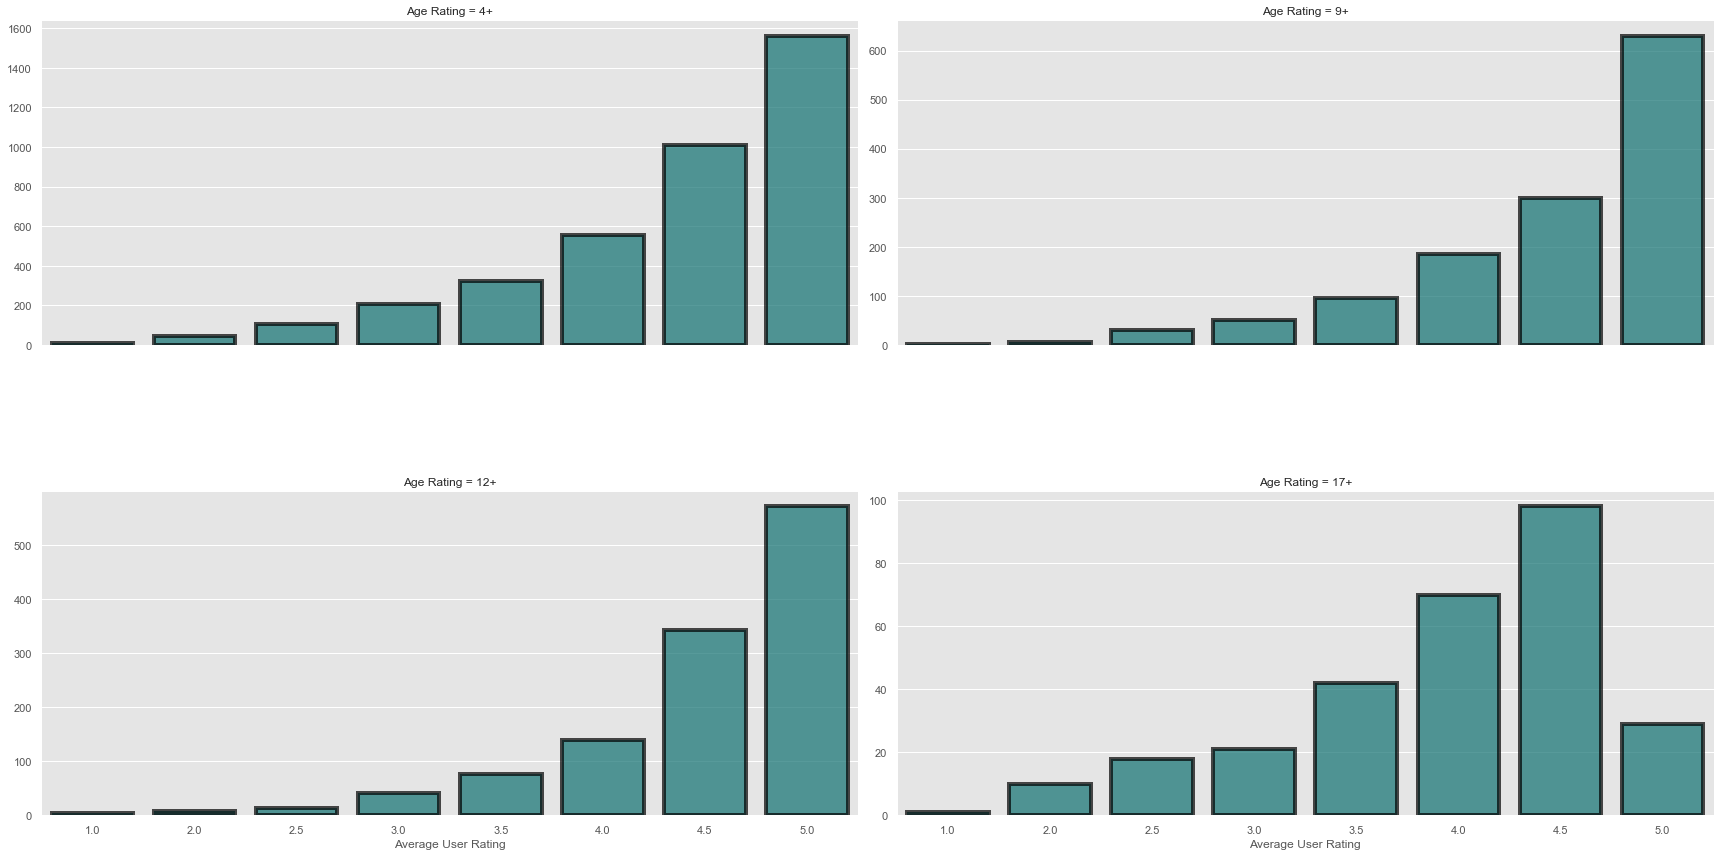

In [156]:
#bold('**AVERAGE RATING BASED BY AGE GROUP**')
ax = sns.FacetGrid(df, col="Age Rating", col_wrap=2, height=6, aspect=2, sharey=False, despine=False)
ax.map(sns.countplot, 'Average User Rating', color="teal", alpha = 0.7, linewidth=4, edgecolor= 'black')
plt.subplots_adjust(hspace=0.45)
plt.show()

#### Price & Rating/Popularity

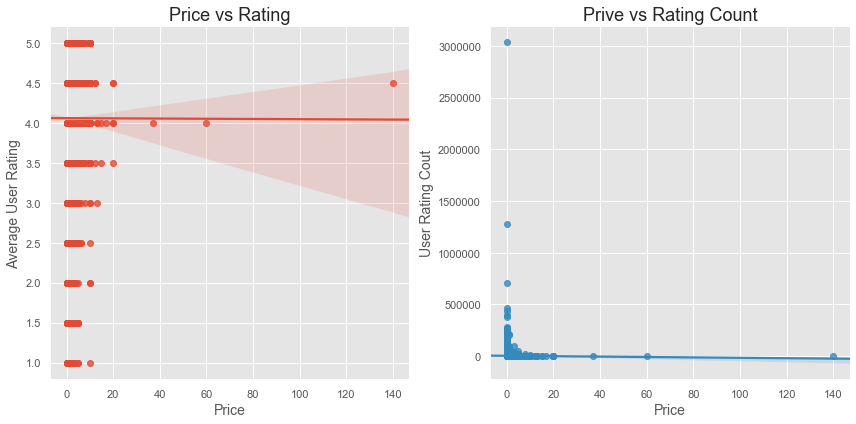

In [149]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.regplot(data=df, x='Price', y='Average User Rating', ax=ax[0])
ax[0].set_title('Price vs Rating',fontsize=18)
ax[0].set_xlabel(xlabel='Price', fontsize=14)
ax[0].set_ylabel(ylabel='Average User Rating', fontsize=14)

sns.regplot(data=df, x='Price', y='User Rating Count', ax=ax[1])
ax[1].set_title('Prive vs Rating Count',fontsize=18)
ax[1].set_xlabel(xlabel='Price', fontsize=14)
ax[1].set_ylabel(ylabel='User Rating Cout', fontsize=14)

plt.tight_layout()

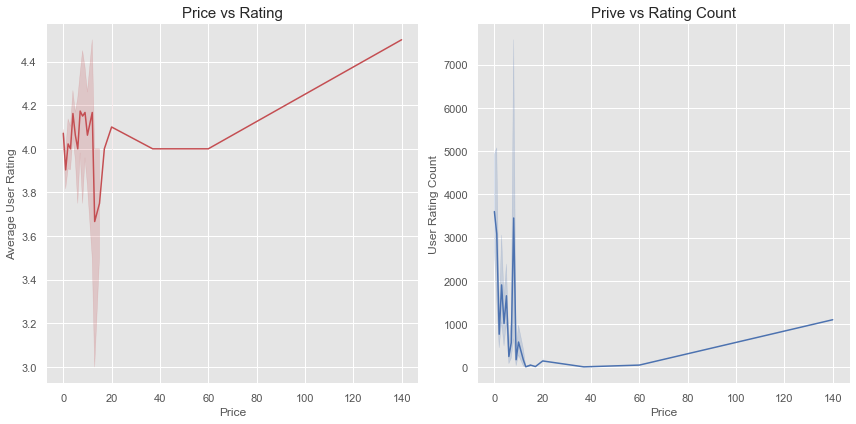

In [93]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
l1 = sns.lineplot(x='Price', y='Average User Rating', data=df, color='r', ax=ax[0])
l2 = sns.lineplot(x='Price', y='User Rating Count', data=df, color='b', ax=ax[1])
ax[0].set_title('Price vs Rating',fontsize=15)
ax[1].set_title('Prive vs Rating Count',fontsize=15)

l1.set(xlabel='Price',ylabel='Average User Rating')
l2.set(xlabel='Price',ylabel='User Rating Count')

plt.tight_layout()

* No relationship between price and user rating

#### Size over Year

In [64]:
warnings.filterwarnings('ignore')
df_size_year = df[['Size', 'Original Release Date']]
df_size_year['Original Release Date'] = pd.to_datetime(df['Original Release Date'])
df_size_year['Year'] = df_size_year['Original Release Date'].dt.year

In [67]:
df_size_year_agg = df_size_year.groupby(['Year']).mean()
df_size_year_agg.head()

,Size
Year,
2008,2.283667e+07
2009,4.222801e+07
2010,4.904644e+07
2011,6.263357e+07
2012,7.971831e+07


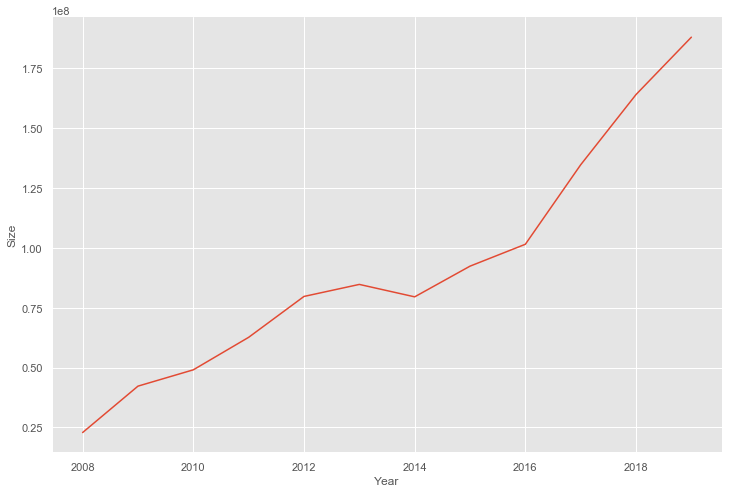

In [80]:
fig = plt.figure(figsize=(12,8))
vision = sns.lineplot(x=df_size_year_agg.index, y=df_size_year_agg.Size, data=df_size_year_agg)
sns.despine(left=False)

## Conclusions

The strategy games are promising. 
1. More than 70% of users who play them tend to give higher ratings (>=4.0). 
2. The strategy games with Battle, Puzzle, War play important roles in the sub-market. And War and Battle are the most popular ones based on the rating people. 
3. Free games takes a great part in the market, but the popularity and performance of games will not be influenced by the price.